# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

3.0846169233846767 0.0569449091176617
3.0886177235447088 0.05295015588234582
3.0926185237047408 0.04895455510668364
3.096619323864773 0.044958170745781775
3.100620124024805 0.04096106676728922
3.104620924184837 0.03696330715037343
3.108621724344869 0.032964955884696265
3.112622524504901 0.028966076969389725
3.116623324664933 0.024966734412031594
3.120624124824965 0.02096699222762087
3.124624924984997 0.016966914437553143
3.128625725145029 0.012966565068595825
3.132626525305061 0.008966008151863332
3.136627325465093 0.004965307721792166
3.140628125625125 0.0009645278151159581
3.144628925785157 -0.0030362675301595296
3.148629725945189 -0.007037014275781417
3.152630526105221 -0.011037648384274729
3.156631326265253 -0.015038105819967403
3.160632126425285 -0.01903832255001527
3.164632926585317 -0.023038234545426983
3.168633726745349 -0.0270377777820889
3.172634526905381 -0.031036888241789864
3.176635327065413 -0.03503550191324592
3.180636127225445 -0.03903355479312489
3.184636927385477 -0.0

-0.10177254854257085
6.1852370474094815 -0.09779171787313909
6.189237847569514 -0.09380932191225444
6.193238647729546 -0.08982542440366224
6.197239447889578 -0.08584008911514218
6.20124024804961 -0.08185337983748756
6.205241048209642 -0.07786536038348431
6.209241848369674 -0.07387609458688953
6.213242648529706 -0.06988564630140975
6.217243448689738 -0.0658940793996789
6.22124424884977 -0.061901457772235845
6.225245049009802 -0.05790784532650185
6.229245849169834 -0.05391330598575757
6.233246649329866 -0.04991790368811988
6.237247449489898 -0.045921702385518494
6.24124824964993 -0.041924766042672305
6.245249049809962 -0.03792715863606552
6.249249849969994 -0.03392894415292366
6.253250650130026 -0.029930186590189353
6.257251450290058 -0.02593094995349795
6.26125225045009 -0.02193129825615304
6.265253050610122 -0.01793129551810185
6.269253850770154 -0.013931005764910478
6.273254650930186 -0.009930493026739111
6.277255451090218 -0.005929821337317108
6.28125625125025 -0.0019290547329180684


9.213842768553711 0.20937445545302036
9.217843568713743 0.2054606656530294
9.221844368873775 0.20154358717143178
9.225845169033807 0.19762328270647642
9.229845969193839 0.19369981500804856
9.233846769353871 0.18977324687666533
9.237847569513903 0.18584364116247054
9.241848369673935 0.18191106076422878
9.245849169833967 0.1779755686283185
9.249849969993999 0.17403722774772462
9.253850770154031 0.17009610116103
9.257851570314063 0.1661522519514067
9.261852370474095 0.1622057432456061
9.265853170634127 0.15825663821294847
9.26985397079416 0.15430500006431183
9.273854770954191 0.1503508920511203
9.277855571114223 0.14639437746433154
9.281856371274255 0.14243551963342377
9.285857171434287 0.13847438192538203
9.28985797159432 0.13451102774368398
9.293858771754351 0.130545520527285
9.297859571914383 0.12657792374960272
9.301860372074415 0.12260830091750115
9.305861172234447 0.11863671557027403
9.30986197239448 0.1146632312786279
9.313862772554511 0.11068791164366452
9.317863572714543 0.106710

-0.4403141434652132
12.114422884576916 -0.4367185355874058
12.118423684736948 -0.43311593742651583
12.12242448489698 -0.4295064066471004
12.126425285057012 -0.4258900010246829
12.130426085217044 -0.42226677844482796
12.134426885377076 -0.4186367969022151
12.138427685537108 -0.4150001144997104
12.14242848569714 -0.41135678944743637
12.146429285857172 -0.40770688006184036
12.150430086017204 -0.404050444764761
12.154430886177236 -0.4003875420824932
12.158431686337268 -0.39671823064485134
12.1624324864973 -0.39304256918423064
12.166433286657332 -0.38936061653466736
12.170434086817364 -0.38567243163089676
12.174434886977396 -0.3819780735074101
12.178435687137428 -0.3782776012975094
12.18243648729746 -0.37457107423236125
12.186437287457492 -0.3708585516400484
12.190438087617524 -0.36714009294462024
12.194438887777556 -0.3634157576651419
12.198439687937588 -0.35968560541474115
12.20244048809762 -0.3559496958996546
12.206441288257652 -0.35220808891827166
12.210442088417684 -0.3484608443601776


15.107021404280855 0.5654195764606094
15.111022204440888 0.5621151863978776
15.11502300460092 0.5588017989055482
15.119023804760952 0.5554794670189621
15.123024604920984 0.5521482439166282
15.127025405081016 0.548808182919371
15.131026205241048 0.545459337489478
15.13502700540108 0.5421017612298434
15.139027805561112 0.5387355078831111
15.143028605721144 0.5353606313308129
15.147029405881176 0.5319771855925074
15.151030206041208 0.5285852248249145
15.15503100620124 0.5251848033210496
15.159031806361272 0.521775975509353
15.163032606521304 0.51835879595282
15.167033406681336 0.514933319348127
15.171034206841368 0.5114996005247565
15.1750350070014 0.5080576944441184
15.179035807161432 0.5046076561986715
15.183036607321464 0.5011495410110409
15.187037407481496 0.49768340423313434
15.191038207641528 0.4942093013452562
15.19503900780156 0.4907272879552194
15.199039807961592 0.4872374197974555
15.203040608121624 0.4837397527321223
15.207041408281656 0.48023434274420995
15.211042208441688 0.4

18.139627925585117 -0.6517791642081663
18.14362872574515 -0.6487397139068433
18.14762952590518 -0.6456898796307686
18.151630326065213 -0.6426297101967503
18.155631126225245 -0.6395592545870249
18.159631926385277 -0.6364785619484734
18.16363272654531 -0.6333876815918347
18.16763352670534 -0.630286662990916
18.171634326865373 -0.6271755557818011
18.175635127025405 -0.6240544097620562
18.179635927185437 -0.6209232748899322
18.18363672734547 -0.6177822012835653
18.1876375275055 -0.6146312392201754
18.191638327665533 -0.6114704391352602
18.195639127825565 -0.6082998516217888
18.199639927985597 -0.6051195274293917
18.20364072814563 -0.6019295174635481
18.20764152830566 -0.5987298727847715
18.211642328465693 -0.5955206446077925
18.215643128625725 -0.5923018843007385
18.219643928785757 -0.589073643384312
18.22364472894579 -0.5858359735309657
18.22764552910582 -0.5825889265640753
18.231646329265853 -0.5793325544571105
18.235647129425885 -0.5760669093328025
18.239647929585917 -0.5727920434623096

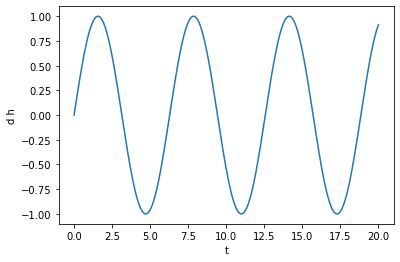

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

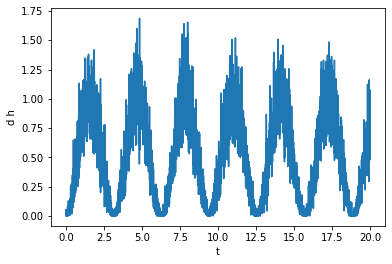

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

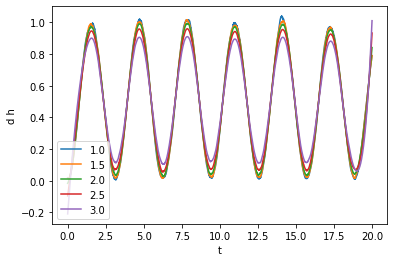

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

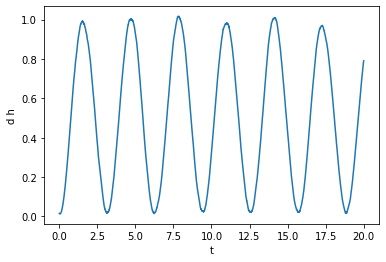

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1976


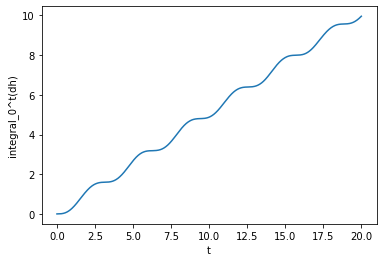

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

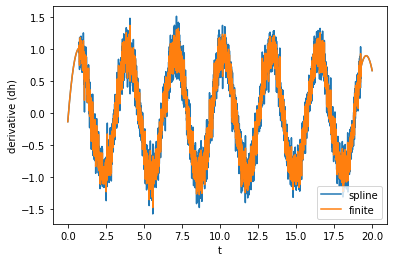

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

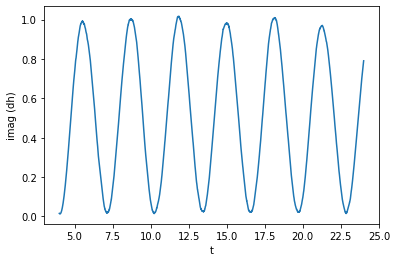

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

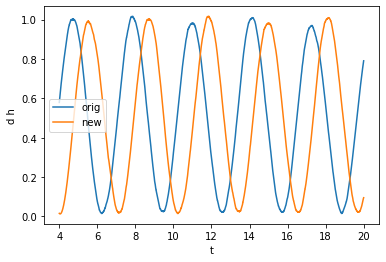

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

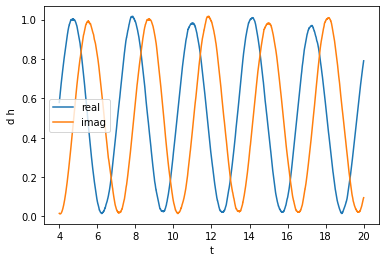

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

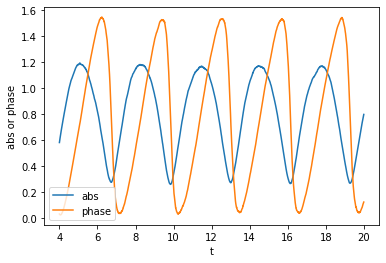

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

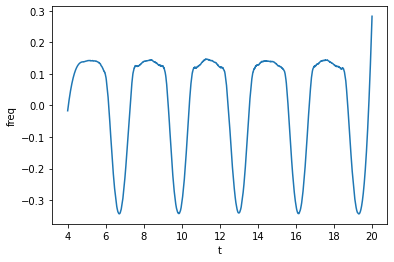

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

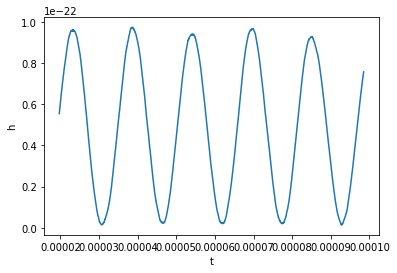

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

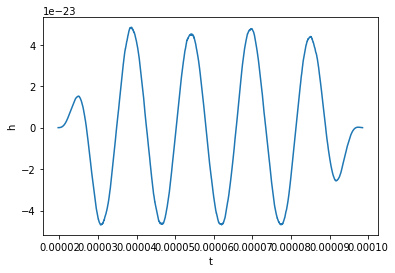

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

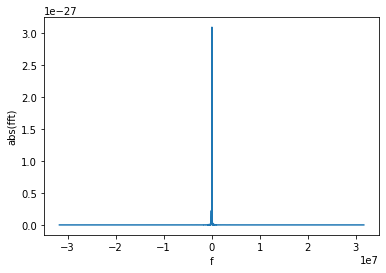

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

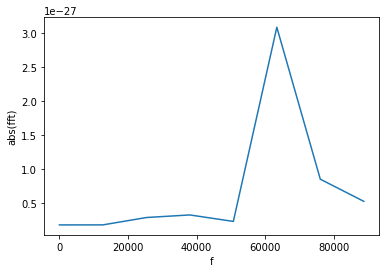

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64206.00


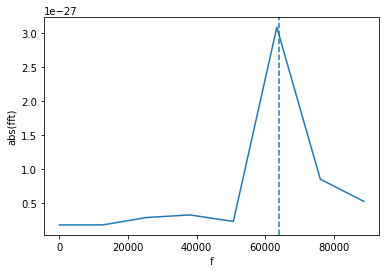

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.091e-27
Maximum with mask 8.487e-28
Length with mask 8
Length after having removed the masked points 7
